---
Some useful $\LaTeX$ commands are defined in this cell:
$$
\newcommand{\abs}[1]{\left\lvert#1\right\rvert}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\set}[1]{\left\{#1\right\}}
\newcommand{\paren}[1]{\left(#1\right)}
\newcommand{\brack}[1]{\left[#1\right]}
\newcommand{\ip}[2]{\left\langle#1,#2\right\rangle}
\DeclareMathOperator{\span}{span}
\DeclareMathOperator{\fl}{fl}
\abs{x}, \norm{x}, \set{x}, \paren{x}, \brack{x}, \ip{x}{y}, \span, \fl
$$

---

---
# 4.3 Elements of Numerical Integration
---

The need often arises for evaluating the definite integral of a function that has no explicit
antiderivative or whose antiderivative is not easy to obtain. For example:

$$\int_0^1e^{-x^2}\,dx.$$

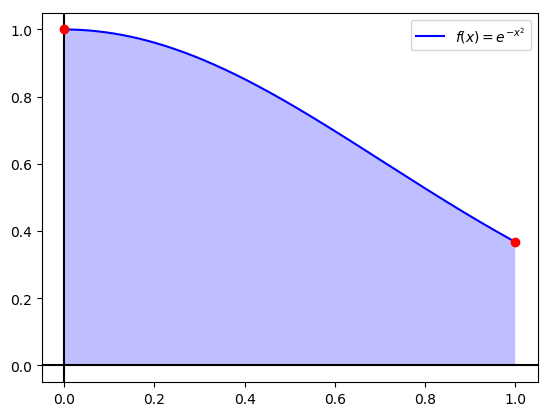

In [1]:
f(x) = exp(-x^2)
a, b = 0., 1.
using PyPlot

xx = collect(linspace(a, b, 1000))

axhline(0, color="k")
axvline(0, color="k")
plot(xx, f.(xx), "b", label=L"f(x)=e^{-x^2}")
#plot(xx, p1.(xx), "r", label=L"p_1(x)")
plot([a, b], [f(a), f(b)], "ro")
fill_between(xx, zeros(xx), f.(xx), facecolor="b", alpha=0.25)
#fill_between(xx, zeros(xx), p1.(xx), facecolor="r", alpha=0.25)
legend(loc="best");

$$\int_0^1\frac{\sin x}{x}\,dx.$$

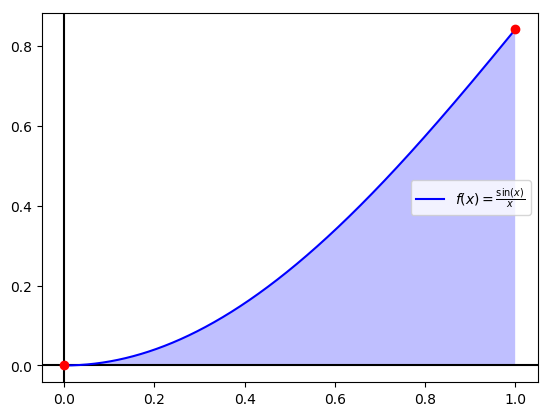

In [2]:
f(x) = (1\x)*sin(x)
a, b = 0., 1.
using PyPlot

xx = collect(linspace(a, b, 1000))

axhline(0, color="k")
axvline(0, color="k")
plot(xx, f.(xx), "b", label=L"f(x)=\frac{\sin(x)}{x}")
#plot(xx, p1.(xx), "r", label=L"p_1(x)")
plot([a, b], [f(a), f(b)], "ro")
fill_between(xx, zeros(xx), f.(xx), facecolor="b", alpha=0.25)
#fill_between(xx, zeros(xx), p1.(xx), facecolor="r", alpha=0.25)
legend(loc="best");

## Basic numerical quadrature algorithms

The goal of this chapter is to determine 
<a href=https://en.wikipedia.org/wiki/Quadrature_(mathematics)>quadrature</a> formulas for approximating

$$
I_f = \int_a^b f(x)\,dx \approx \sum_{j=0}^n a_j f(x_j).
$$

We just need to determine the **quadrature weights** $a_j$ and **points** $x_j$.

---

### A simple approach

1. Compute the value of the function $f$ at a few points $x_0,\ldots,x_n \in [a,b]$.
2. Interpolate $(x_0,f(x_0)),\ldots,(x_n,f(x_n))$ with a polynomial $p_n$ written in Lagrange form:
$$
p_n(x) = \sum_{j=0}^n f(x_j) L_j(x).
$$
3. Then the integral of the polynomial $p_n$,
$$
\int_a^b p_n(x)\,dx = \sum_{j=0}^n a_j f(x_j), \quad a_j = \int_a^b L_j(x)\,dx,
$$
approximates the integral of $f$.

---

### Quadrature error

Recall that

$$
f(x) - p_n(x) = \frac{f^{(n+1)}(\xi(x))}{(n+1)!}\prod_{j=0}^n (x - x_j)
%=f[x_0,\ldots,x_n,x] \prod_{j=0}^n (x - x_j).
$$

Therefore, the **quadrature error** is

$$
\begin{align}
E(f) 
&= \int_a^b f(x)\,dx - \sum_{j=0}^n a_j f(x_j) \\
&= \int_a^b f(x)\,dx - \int_a^b p_n(x)\,dx \\
&= \int_a^b \bigl(f(x) - p_n(x)\bigr)\,dx \\
&= \frac{1}{(n+1)!} \int_a^b \prod_{j=0}^n (x - x_j)\; f^{(n+1)}(\xi(x))\,dx\\
%&= \int_a^b f[x_0,\ldots,x_n,x] \prod_{j=0}^n (x - x_j)\,dx.
\end{align}
$$

---

## Trapezoidal rule

Let $x_0 = a$ and $x_1 = b$. Then

$$
L_0(x) = \frac{x - b}{a - b}, \quad L_1(x) = \frac{x - a}{b - a}.
$$

Thus,

$$
a_0 = \int_a^b L_0(x)\,dx = \frac{b - a}{2}, \quad 
a_1 = \int_a^b L_1(x)\,dx = \frac{b - a}{2}.
$$

Therefore, the **trapezoidal rule** is

$$
\begin{align}
I_f \approx \sum_{j=0}^1 a_j f(x_j) 
&= \frac{(b - a)}{2} f(a) + \frac{b - a}{2} f(b)\\
&= \frac{(b - a)}{2} \big[f(a) + f(b)\big] =: I_{\mathrm{trap}}.
\end{align}
$$

## Trapezoidal rule error

Recall that the error is

$$
E(f) = \frac{1}{(n+1)!} \int_a^b \prod_{j=0}^n (x - x_j)\; f^{(n+1)}(\xi(x))\,dx.
$$

For the Trapezoidal rule, we have

$$E(f)=I_f-I_{\mathrm{trap}}=\frac{1}{2}\int_a^b f^{\prime\prime}(\xi)(x-a)(x-b)\,dx=\frac{f^{\prime\prime}(\xi)}{2}\left[\frac{x^3}{3}-\frac{(a+b)}{2}x^2+abx\right]_{x=a}^{x=b}=-\frac{(b-a)^3}{12}f^{\prime\prime}(\xi)\approx \mathcal{O}\left((b-a)^3\right).$$

Summarizing:

$$\fbox{${\displaystyle I_f=\int_a^b f(x)\,dx=\frac{(b - a)}{2} \Big[f(a) + f(b)\Big]-\frac{(b-a)^3}{12}f^{\prime\prime}(\xi)=I_{\mathrm{trap}}-\frac{(b-a)^3}{12}f^{\prime\prime}(\xi).}$}$$



---
## Example

$$
I_f = \int_0^1 \paren{\frac{4}{1+x^2}} dx = \pi
$$

Determine $I_{\mathrm{trap}}$.

In [3]:
f(x) = 4/(1 + x^2)

f (generic function with 1 method)

In [4]:
a, b = 0., 1.
If = π

π = 3.1415926535897...

In [5]:
Itrap = (b - a)/2 *(f(a) + f(b))

3.0

In [6]:
Ef = If - Itrap

0.14159265358979312

In [7]:
p1(x) = f(a)*(x - b)/(a - b) + f(b)*(x - a)/(b - a)

p1 (generic function with 1 method)

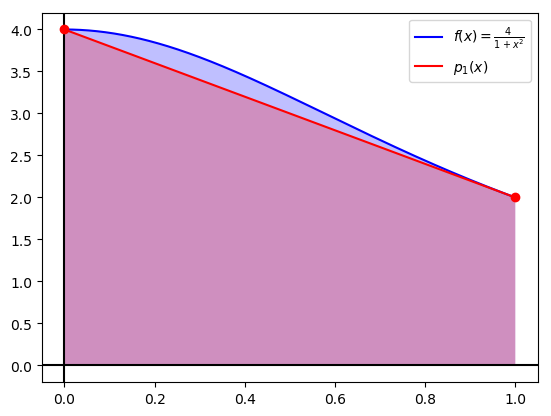

In [8]:
using PyPlot

xx = collect(linspace(a, b, 1000))

axhline(0, color="k")
axvline(0, color="k")
plot(xx, f.(xx), "b", label=L"f(x)=\frac{4}{1 + x^2}")
plot(xx, p1.(xx), "r", label=L"p_1(x)")
plot([a, b], [f(a), f(b)], "ro")
fill_between(xx, zeros(xx), f.(xx), facecolor="b", alpha=0.25)
fill_between(xx, zeros(xx), p1.(xx), facecolor="r", alpha=0.25)
legend(loc="best");

---

## Simpson rule

Let $x_0 = a$, $x_1 = x_m$, and $x_2 = b$, where $x_m = \frac{a+b}{2}$. Then

$$
L_0(x) = \frac{(x - x_m)(x - b)}{(a - x_m)(a - b)}, \quad 
L_1(x) = \frac{(x - a)(x - b)}{(x_m - a)(x_m - b)}, \quad
L_2(x) = \frac{(x - a)(x - x_m)}{(b - a)(b - x_m)}.
$$

Thus,

$$
a_0 = \int_a^b L_0(x)\,dx = \frac{1}{6}(b-a), \quad 
a_1 = \int_a^b L_1(x)\,dx = \frac{2}{3}(b-a), \quad
a_2 = \int_a^b L_2(x)\,dx = \frac{1}{6}(b-a), \quad 
$$

Therefore, the **Simpson rule** is

$$
\begin{align}
I_f \approx \sum_{j=0}^2 a_j f(x_j) 
&= \frac{1}{6}(b-a) f(a) + \frac{2}{3}(b-a) f(x_m) + \frac{1}{6}(b-a) f(b)\\
&= \frac{b - a}{6} \Big[f(a) + 4f\Big(\frac{b+a}{2}\Big) + f(b)\Big]=: I_{\mathrm{Simp}}.
\end{align}
$$

The error is given by

$$
E(f) = I_f - I_{\mathrm{Simp}} = -\frac{f''''(\xi)}{90} \paren{\frac{b - a}{2}}^5,
$$

for some $\xi \in (a,b)$.

Summarizing:

$$\fbox{${\displaystyle I_f=\int_a^b f(x)\,dx=\frac{b - a}{6} \brack{f(a) + 4f\paren{\frac{b+a}{2}} + f(b)}-\frac{f''''(\xi)}{90} \paren{\frac{b - a}{2}}^5=I_{\mathrm{Simp}}-\frac{f''''(\xi)}{90} \paren{\frac{b - a}{2}}^5}$}$$


---
## Example

$$
I_f = \int_0^1 \paren{\frac{4}{1+x^2}} dx = \pi
$$

Determine $I_{\mathrm{Simp}}$.

In [9]:
ISimp = (b - a)/6 * (f(a) + 4f((a+b)/2) + f(b))

3.1333333333333333

In [10]:
Ef = If - ISimp

0.008259320256459812

In [11]:
m = (a + b)/2
p2(x) = 
    f(a)*(x - m)*(x - b)/(a - m)/(a - b) + 
    f(m)*(x - a)*(x - b)/(m - a)/(m - b) + 
    f(b)*(x - a)*(x - m)/(b - a)/(b - m)

p2 (generic function with 1 method)

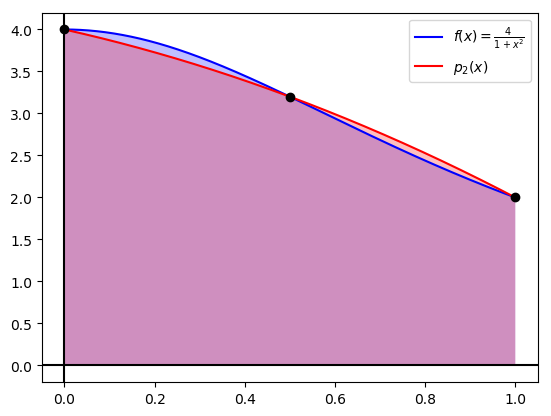

In [12]:
using PyPlot

xx = collect(linspace(a, b, 1000))

axhline(0, color="k")
axvline(0, color="k")
plot(xx, f.(xx), "b", label=L"f(x)=\frac{4}{1 + x^2}")
plot(xx, p2.(xx), "r", label=L"p_2(x)")
plot([a, m, b], [f(a), f(m), f(b)], "ko")
fill_between(xx, zeros(xx), f.(xx), facecolor="b", alpha=0.25)
fill_between(xx, zeros(xx), p2.(xx), facecolor="r", alpha=0.25)
legend(loc="best");

---

## Quadrature rules

$$
\begin{align}
\\
\int_a^b f(x)\,dx &= \frac{b - a}{2}\brack{f(a) + f(b)} -\frac{f''(\xi)}{12} (b - a)^3 \quad &\text{(Trapezoidal)} \\\\
\int_a^b f(x)\,dx &= \frac{b - a}{6}\brack{f(a) + 4f\paren{\frac{a+b}{2}} + f(b)} -\frac{f''''(\xi)}{90} \paren{\frac{b - a}{2}}^5\quad &\text{(Simpson)} \\\\
\end{align}
$$

In each case, $\xi$ is some unknown point in the interval $(a,b)$.

## Precision

-   If $f$ is a polynomial of degree at most **one**, then the **midpoint and trapezoidal rules  are exact**, so we say that these rules have **precision 1**.

-   If $f$ is a polynomial of degree at most **three**, then the **Simpson rule is exact**, so we say that the Simpson rule has **precision 3**.

---

## Example

Let 

$$f(x) = x^3 - 14x^2 + 49x + 14,$$

so we have

$$\int_0^{10} f(x) dx = \left. \frac{x^4}{4} - \frac{14x^3}{3} + \frac{49x^2}{2} + 14x \right |_0^{10} = \frac{1270}{3}.$$

By the **Simpson rule**, we have

$$
\begin{split}
\int_0^{10} f(x) dx 
& = \frac{10}{6}( f(0) + 4f(5) + f(10) ) - \frac{f''''(\xi)}{90}5^5 \\
& = \frac{10}{6}( 14 + 4 \cdot 34 + 104 ) - 0 \\
& = \frac{1270}{3}.
\end{split}
$$

This implies that the area under the graph of the quadratic polynomial that interpolates the data $(0,14)$, $(5,34)$, and $(10,104)$,

$$p_2(x) = x^2 - x + 14,$$

is equal to the area under the cubic polynomial $f(x)$.

In [13]:
g(x) = x^3 - 14x^2 + 49x + 14
p(x) = x^2 - x + 14

p (generic function with 1 method)

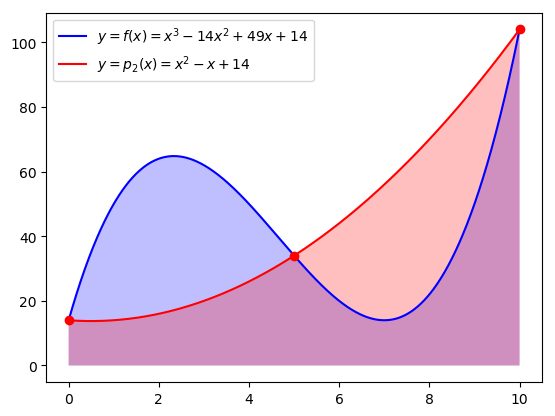

In [14]:
using PyPlot

a, b = 0, 10

# Plot the cubic function f and the interpolating polynomial p2
xx = linspace(a, b, 1000)
plot(xx, g.(xx), "b", label=L"y = f(x)=  x^3 - 14x^2 + 49x + 14")
plot(xx, p.(xx), "r", label=L"y = p_2(x)= x^2 - x + 14")
fill_between(xx, zeros(xx), g.(xx), facecolor="b", alpha=0.25)
fill_between(xx, zeros(xx), p.(xx), facecolor="r", alpha=0.25)
plot([a, (a+b)/2, b], [g(a), g((a+b)/2), g(b)], "ro")
legend(loc="best");

The area under the blue and red curves are equal, although the blue curve is the graph of a cubic polynomial and the red curve is the graph of a quadratic polynomial.

---